In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import torch
import pickle
from numpy import linalg

# Import Dataset

In [9]:
with open('BSBT_df.pkl', 'rb') as f:
    BSBT_df = pickle.load(f)

with open('MyFinalDic.pkl', 'rb') as f:
    final_dic = pickle.load(f)    

In [10]:
# Step 1: Extract ATECO and COD_STAT from Final_dic
ateco_list = final_dic.get('ATECO', [])
cod_stat_list = final_dic.get('COD STAT', [])

# Step 2: Filter keys that start with "BSBT"
filtered_dic = {k: v for k, v in final_dic.items() if k.startswith('BSBT')}
print(len(filtered_dic))
# Step 3: Create a list of column names and their corresponding values (lists)
column_names = []
data = {}

for key in filtered_dic:
    # Extract the number after BSBT (e.g., for BSBT1 -> 1)
    index = int(key.replace('BSBT', '')) - 1  # Subtract 1 because lists are zero-indexed

    # Get the corresponding values from ATECO and COD_STAT
    ateco_value = ateco_list[index] if index < len(ateco_list) else 'NA'
    cod_stat_value = cod_stat_list[index] if index < len(cod_stat_list) else 'NA'

    # Create the new column name in the format {index+1}_{ATECO_value}_{COD_STAT_value}
    column_name = f"{index+1}_{ateco_value}_{cod_stat_value}"

    # Add the column name and the corresponding list of values to the dictionary
    column_names.append(column_name)
    data[column_name] = filtered_dic[key]  # Assuming each value is a list

# Step 4: Create the DataFrame with the column names as headers and lists as columns
BSBT_df = pd.DataFrame(data)

925


In [3]:
print(BSBT_df)

       BSBT8  BSBT23  BSBT37  BSBT38  BSBT39  BSBT42  BSBT46  BSBT56  BSBT60  \
0      8.110   17.32   44.72   47.52  43.075  16.050   38.48  20.525   8.020   
1      8.170   19.01   47.84   48.22  30.125  16.500   38.68  18.350   7.980   
2      8.110   17.25   45.68   48.10  18.350  17.050   38.42  18.850   8.100   
3      8.180   17.32   46.44   48.12  15.900  19.250   39.84  18.850   8.000   
4      8.190   17.30   44.56   47.96  12.850  16.175   41.32  18.425   8.140   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
8755  17.861   10.78   43.84   25.14  42.125  28.400   45.46  33.762   5.149   
8756  18.614   11.68   48.60   18.22  40.975  16.300   44.18  33.398   5.463   
8757  18.997   10.30   45.44   18.26  47.075  17.400   44.54  33.216   5.626   
8758  16.553   10.71   42.20   18.40  49.425  16.150   40.56  36.282   5.735   
8759  10.355   10.09   43.28   17.62  50.325  17.150   37.90  33.548   5.695   

      BSBT61  ...  BSBT1466  BSBT1539  

# SVD

In [11]:
u,s,v=np.linalg.svd(BSBT_df)

KeyboardInterrupt: 

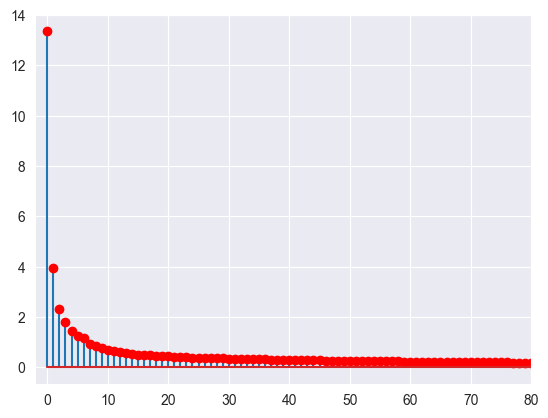

In [5]:
plt.stem(100*s/np.sum(s), markerfmt='ro')
plt.xlim(-2, 80)
plt.show()

In [6]:
import sys
print(sys.executable)

C:\Users\morte\anaconda3\python.exe


In [7]:
print(s)

[7.57167899e+04 2.25225130e+04 1.31231499e+04 1.03240494e+04
 8.15806130e+03 6.99333771e+03 6.53016988e+03 5.23736625e+03
 4.83874574e+03 4.37572673e+03 3.98793205e+03 3.76007368e+03
 3.47222688e+03 3.17029889e+03 3.05223898e+03 2.90869763e+03
 2.82350962e+03 2.72416210e+03 2.67979101e+03 2.61360323e+03
 2.55860150e+03 2.42962031e+03 2.38964623e+03 2.25291544e+03
 2.20876832e+03 2.17392822e+03 2.15755410e+03 2.10512656e+03
 2.07414166e+03 2.02646303e+03 1.96346785e+03 1.93946743e+03
 1.90758520e+03 1.88669880e+03 1.86186272e+03 1.82549004e+03
 1.80764230e+03 1.76564525e+03 1.75559566e+03 1.68679256e+03
 1.68167790e+03 1.66804324e+03 1.65194306e+03 1.61935487e+03
 1.59246345e+03 1.58536921e+03 1.56654014e+03 1.54701568e+03
 1.53603255e+03 1.51336249e+03 1.50608005e+03 1.48167515e+03
 1.46802952e+03 1.43861007e+03 1.42475892e+03 1.39731987e+03
 1.36946484e+03 1.36089836e+03 1.35648454e+03 1.34390213e+03
 1.32423648e+03 1.31096774e+03 1.30404337e+03 1.28204110e+03
 1.27609307e+03 1.253110

# PCA

In [12]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler

# Scaling the data

In [13]:
load_array = np.array(BSBT_df)
scaler = StandardScaler()
load_array_standardized = scaler.fit_transform(load_array)

In [14]:
variance_ratio=0.9

# Perform PCA on the standardized data to retain 90% of variance
pca = PCA(n_components=variance_ratio, random_state=42)
reduced_dimensions = pca.fit_transform(load_array_standardized)

# Determine the number of components used
n_components = pca.n_components_
print(f"Number of PCA components retained to explain {int(variance_ratio * 100)}% of the variance: {n_components}")

Number of PCA components retained to explain 80% of the variance: 21


## 3D Visualization

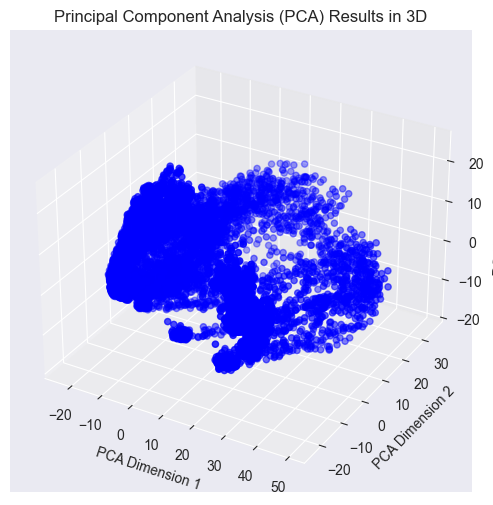

In [21]:
if n_components >= 3:
    fig = plt.figure(figsize=(10, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(reduced_dimensions[:, 0], reduced_dimensions[:, 1], reduced_dimensions[:, 2], c='blue', marker='o')
    ax.set_xlabel('PCA Dimension 1')
    ax.set_ylabel('PCA Dimension 2')
    ax.set_zlabel('PCA Dimension 3')
    ax.set_title('Principal Component Analysis (PCA) Results in 3D')
    plt.show()

# Clustering

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples

## K-means

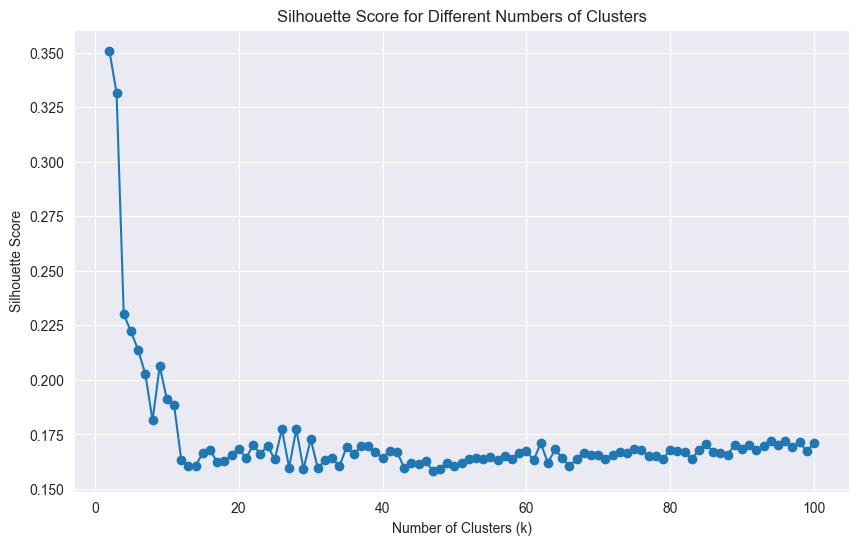

Optimal number of clusters (k): 2


In [24]:
max_k=100

# Determine the optimal number of clusters using silhouette scores
silhouette_scores = []
for k in range(2, max_k + 1):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(reduced_dimensions)
    silhouette_avg = silhouette_score(reduced_dimensions, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plot silhouette scores for different numbers of clusters
plt.figure(figsize=(10, 6))
plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', label='Silhouette Score')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Different Numbers of Clusters')
plt.grid(True)
plt.show()

# Optimal number of clusters based on silhouette score
optimal_k = silhouette_scores.index(max(silhouette_scores)) + 2
print(f'Optimal number of clusters (k): {optimal_k}')    

In [28]:
selected_k = 62
# Perform final clustering with the selected number of clusters
kmeans_optimal = KMeans(n_clusters=selected_k, n_init=10, random_state=42)
cluster_labels_optimal = kmeans_optimal.fit_predict(reduced_dimensions)
silhouette_scores_individual = silhouette_samples(reduced_dimensions, cluster_labels_optimal)

results_df = pd.DataFrame(data=reduced_dimensions, columns=[f'PCA_{i+1}' for i in range(n_components)])
results_df['Cluster'] = cluster_labels_optimal
#results_df['Load_Name'] = load_names
results_df['Silhouette_Score'] = silhouette_scores_individual

# Filtering step: Only include loads with a silhouette score >= 0.4
#results_df = results_df[results_df['Silhouette_Score'] >= 0.4].reset_index(drop=True)

In [16]:
print(results_df)

         PCA_1     PCA_2     PCA_3     PCA_4     PCA_5     PCA_6     PCA_7  \
0    -0.272145 -0.148471  0.146140  0.131348 -0.180594  0.079896  0.096452   
1    -0.313550 -0.187473  0.091495  0.159619 -0.141828  0.089584  0.113131   
2    -0.324236 -0.206512  0.050687  0.175575 -0.106749  0.085061  0.124315   
3    -0.336654 -0.231870  0.029926  0.192978 -0.074271  0.090418  0.129599   
4    -0.343179 -0.243137  0.005027  0.205069 -0.047172  0.098273  0.135778   
...        ...       ...       ...       ...       ...       ...       ...   
8755 -0.085030  0.012668  0.359929  0.023684 -0.133855  0.057108  0.045948   
8756 -0.125472 -0.009964  0.321361  0.025831 -0.197664  0.036834  0.036410   
8757 -0.148238 -0.039932  0.311233  0.044275 -0.225326  0.037979  0.043285   
8758 -0.171664 -0.055159  0.285268  0.054950 -0.231407  0.031532  0.057481   
8759 -0.235384 -0.104513  0.233021  0.080591 -0.205167  0.039088  0.075702   

         PCA_8     PCA_9    PCA_10  ...    PCA_23    PCA_24    

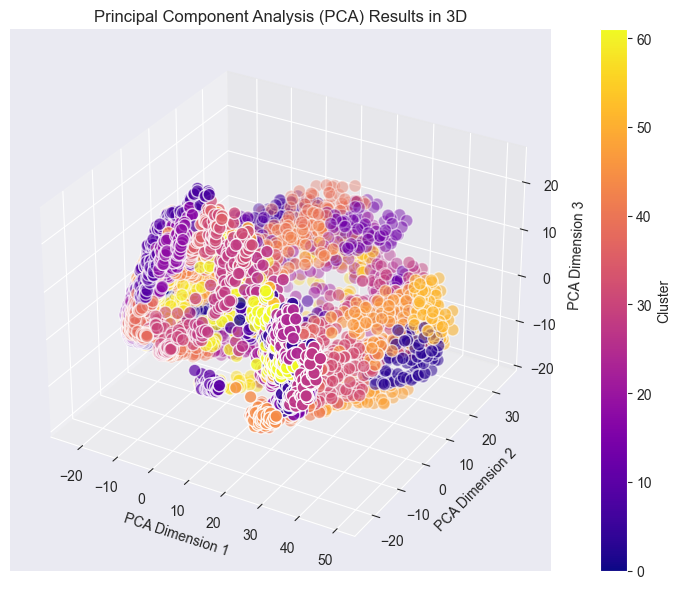

In [38]:
import matplotlib.colors as mcolors
import seaborn as sns

#colormap = 'tab20'
colormap = 'plasma'
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(results_df['PCA_1'], results_df['PCA_2'], results_df['PCA_3'],
                     c=results_df['Cluster'], cmap=colormap, edgecolor='w', s=80)

ax.set_xlabel('PCA Dimension 1')
ax.set_ylabel('PCA Dimension 2')
ax.set_zlabel('PCA Dimension 3')
ax.set_title('Principal Component Analysis (PCA) Results in 3D')

cbar = plt.colorbar(scatter, ax=ax)
cbar.set_label('Cluster')

plt.tight_layout()

plt.show()

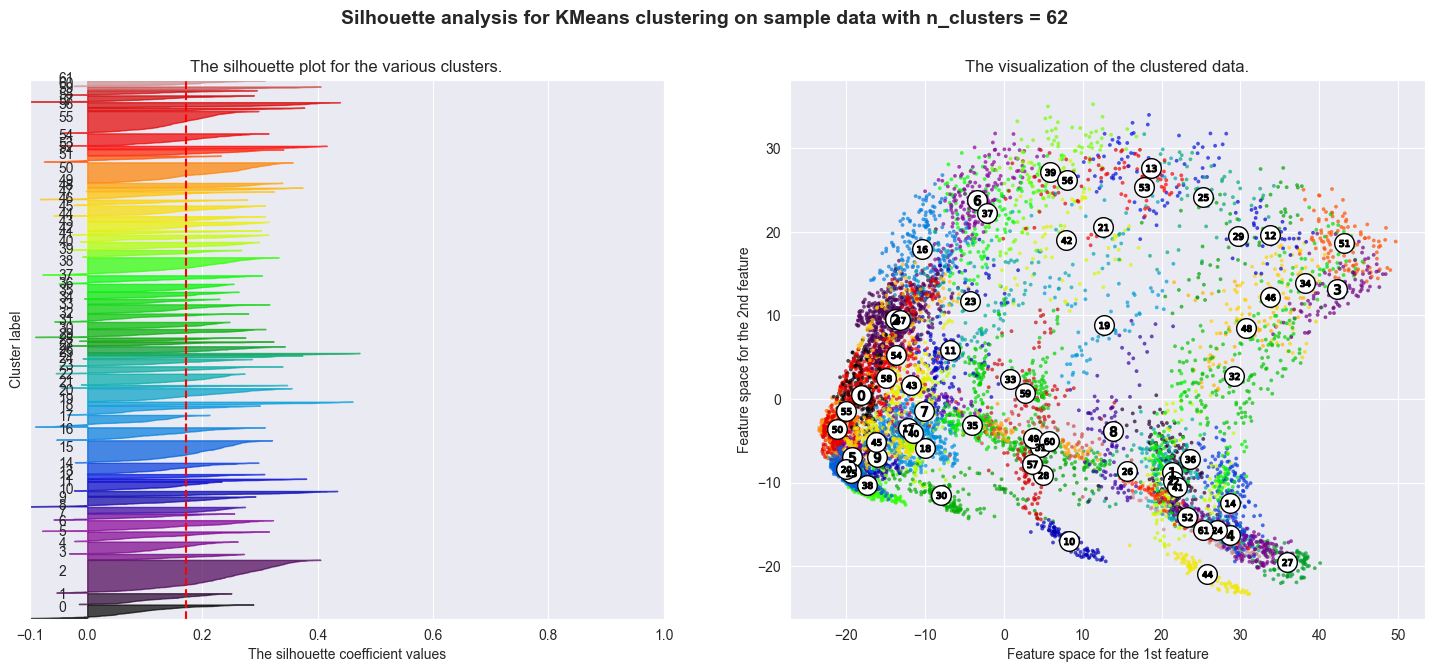

In [30]:
def plot_silhouette(X, cluster_labels, n_clusters):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Compute the average silhouette score for all samples
    avg_score = silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to cluster i
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=avg_score, color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = kmeans_optimal.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for KMeans clustering on sample data with n_clusters = {n_clusters}",
                 fontsize=14, fontweight='bold')

    plt.show()

plot_silhouette(reduced_dimensions, cluster_labels_optimal, selected_k)

## Hierarchical cluster and dendrograms

In [31]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

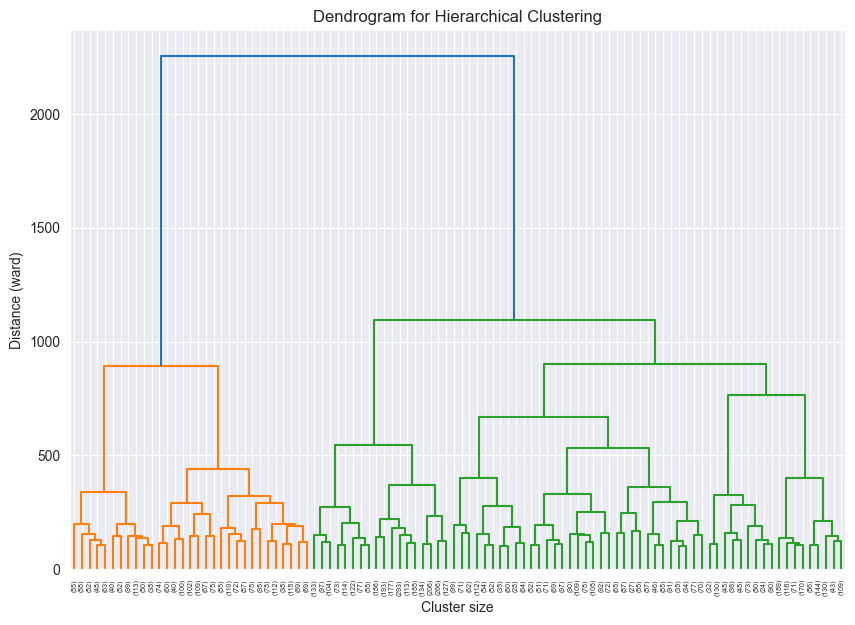

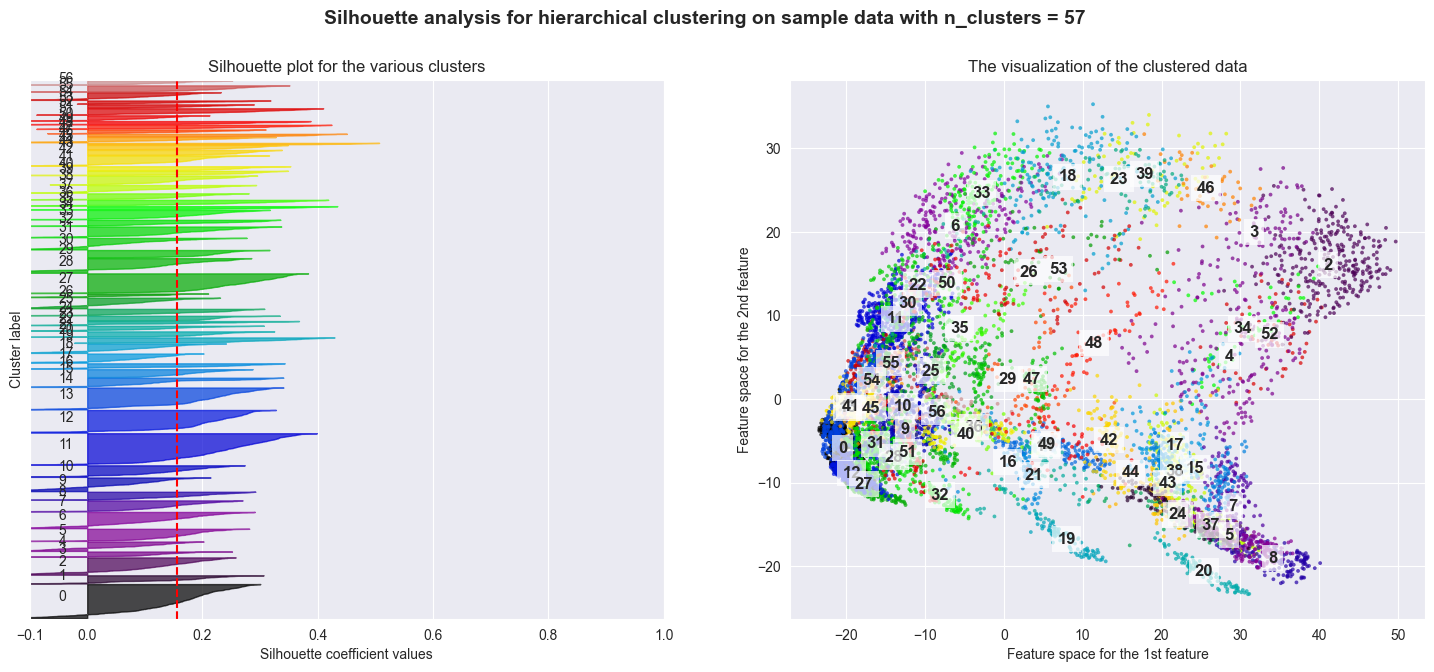

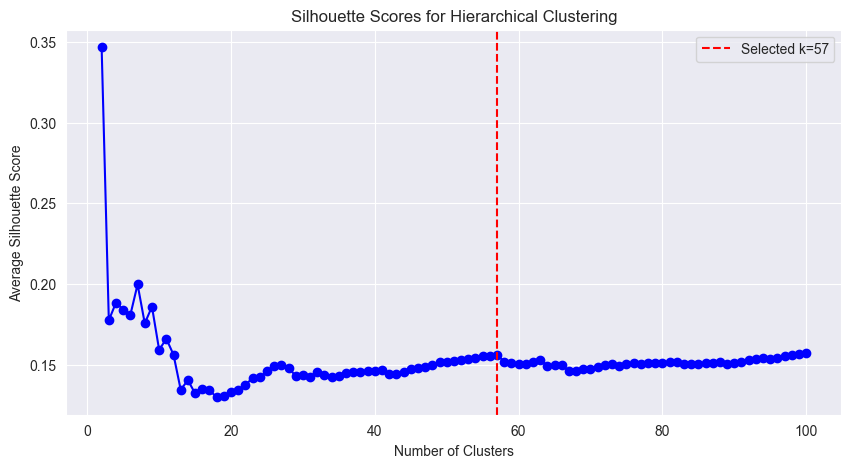

In [35]:
selected_k_Hierarchical=57
max_k=100

def plot_dendrogram_and_silhouette(X, max_k, selected_k):
    linked = linkage(X, method='ward')

    # Plot the dendrogram
    plt.figure(figsize=(10, 7))
    dendrogram(linked, truncate_mode='lastp', p=max_k)
    plt.title('Dendrogram for Hierarchical Clustering')
    plt.xlabel('Cluster size')
    plt.ylabel('Distance (ward)')
    plt.show()

    # Perform clustering with the selected number of clusters
    hierarchical = AgglomerativeClustering(n_clusters=selected_k, metric='euclidean', linkage='ward')
    cluster_labels = hierarchical.fit_predict(X)

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Create silhouette plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (selected_k + 1) * 10])

    y_lower = 10
    for i in range(selected_k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / selected_k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / selected_k)
    scatter = ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Add cluster numbers to the plot
    for i in range(selected_k):
        cluster_points = X[cluster_labels == i]
        centroid = np.mean(cluster_points, axis=0)
        ax2.text(centroid[0], centroid[1], str(i), fontweight='bold', fontsize=12,
                 ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for hierarchical clustering on sample data with n_clusters = {selected_k}",
                 fontsize=14, fontweight='bold')

    plt.show()

    # Plot silhouette scores for different k
    silhouette_scores = []
    for k in range(2, max_k + 1):
        hierarchical = AgglomerativeClustering(n_clusters=k, metric='euclidean', linkage='ward')
        cluster_labels = hierarchical.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='b')
    plt.axvline(x=selected_k, color='r', linestyle='--', label=f'Selected k={selected_k}')
    plt.title('Silhouette Scores for Hierarchical Clustering')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_dendrogram_and_silhouette(reduced_dimensions, max_k, selected_k_Hierarchical)

## Gaussian Mixture Models (GMMs)

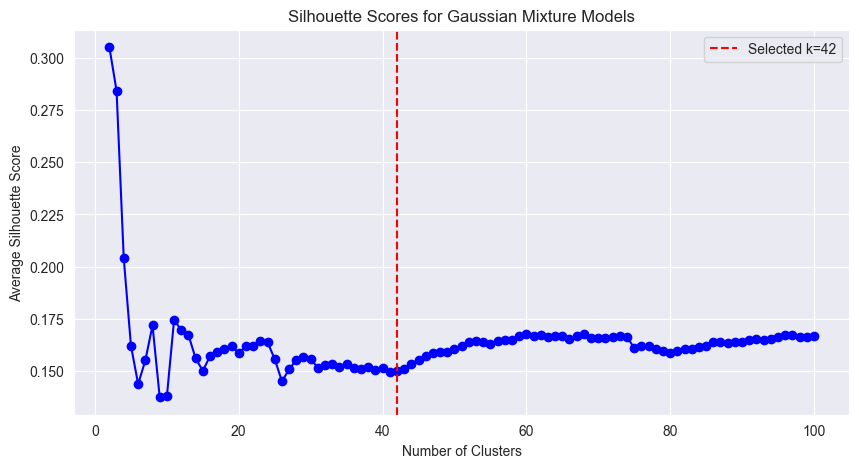

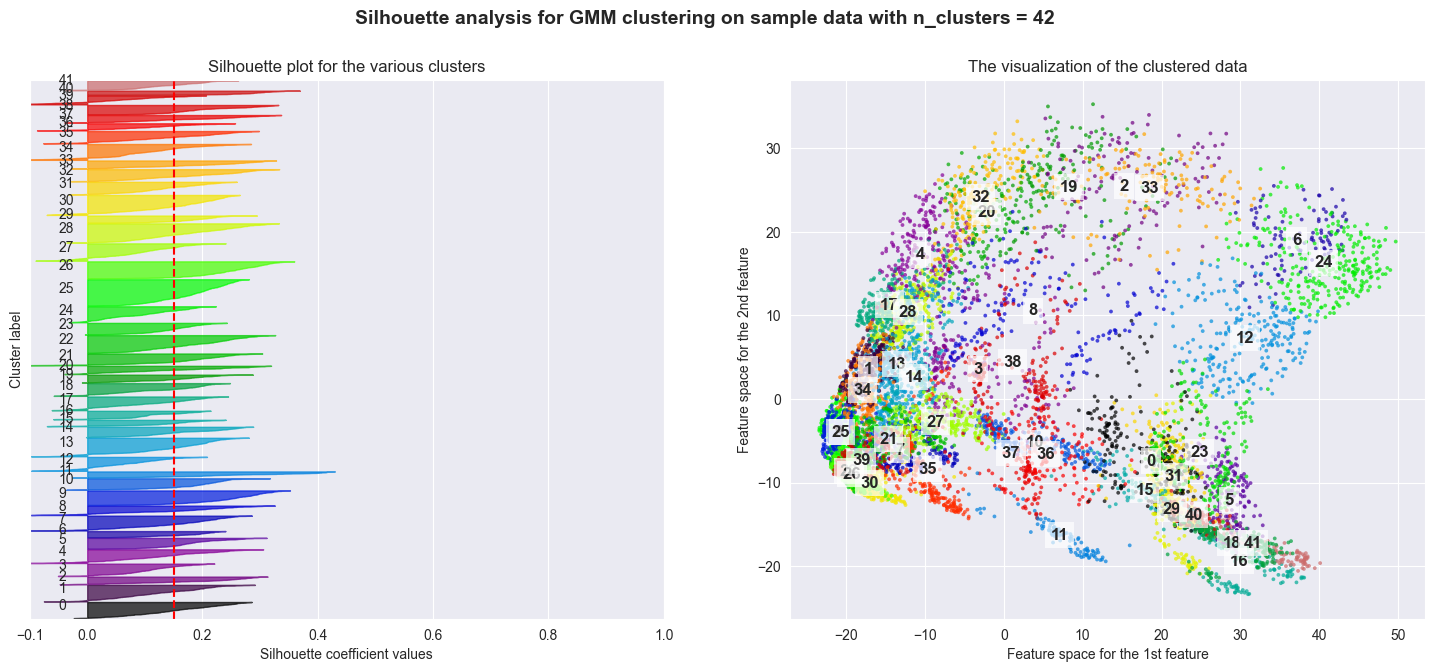

In [37]:
from sklearn.mixture import GaussianMixture

max_k = 100
selected_k_gmm=42

def plot_gmm_silhouette(X, max_k, selected_k):
    # Calculate silhouette scores for different k
    silhouette_scores = []
    for k in range(2, max_k + 1):
        gmm = GaussianMixture(n_components=k, random_state=42)
        cluster_labels = gmm.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        silhouette_scores.append(silhouette_avg)

    # Plot silhouette scores
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, max_k + 1), silhouette_scores, marker='o', color='b')
    plt.axvline(x=selected_k, color='r', linestyle='--', label=f'Selected k={selected_k}')
    plt.title('Silhouette Scores for Gaussian Mixture Models')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Average Silhouette Score')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Perform clustering with the selected number of clusters
    gmm = GaussianMixture(n_components=selected_k, random_state=42)
    cluster_labels = gmm.fit_predict(X)

    # Calculate silhouette scores
    silhouette_avg = silhouette_score(X, cluster_labels)
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    # Create silhouette plot
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (selected_k + 1) * 10])

    y_lower = 10
    for i in range(selected_k):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = plt.cm.nipy_spectral(float(i) / selected_k)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette plot for the various clusters")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = plt.cm.nipy_spectral(cluster_labels.astype(float) / selected_k)
    scatter = ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

    # Add cluster numbers to the plot
    for i in range(selected_k):
        cluster_points = X[cluster_labels == i]
        centroid = np.mean(cluster_points, axis=0)
        ax2.text(centroid[0], centroid[1], str(i), fontweight='bold', fontsize=12,
                 ha='center', va='center', bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

    ax2.set_title("The visualization of the clustered data")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(f"Silhouette analysis for GMM clustering on sample data with n_clusters = {selected_k}",
                 fontsize=14, fontweight='bold')

    plt.show()

plot_gmm_silhouette(reduced_dimensions, max_k, selected_k_gmm)
